In [10]:
import tkinter
tkinter.TkVersion

8.6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

Datadir = "C:/Users/91895/OneDrive/Desktop/datasets/train_folder"
Categories = ["Smile","NoSmile"]

for category in Categories:
    path = os.path.join(Datadir, category)
    for Img in os.listdir(path):
        Img_array = cv2.imread(os.path.join(path,Img),cv2.IMREAD_GRAYSCALE)

print("success")

success


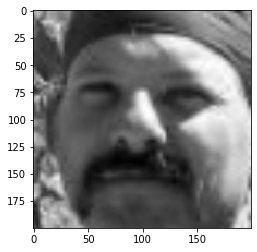

In [2]:
Img_size = 200

new_array = cv2.resize(Img_array,(Img_size,Img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [3]:
training_data = []
def create_training_data():
    for category in Categories:
        path = os.path.join(Datadir, category)
        class_num = Categories.index(category)
        for Img in os.listdir(path):
            try:
                vid_array = cv2.imread(os.path.join(path,Img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(vid_array,(Img_size,Img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [4]:
import random
random.shuffle(training_data)

In [5]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
0
0
1
1
0
1


In [6]:
X = []
y = []
for features,label in training_data:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1, Img_size,Img_size, 1)
y = np.array(y)

In [7]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [13]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
#print(X)
#print(y[876])

0


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import pickle
from tensorflow.keras.callbacks import TensorBoard
import time
NAME = "train_folder-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()
model.add(Conv2D(64,(3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
'''
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
'''
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

h1=model.fit(X, y, batch_size = 10, epochs=18, validation_split = 0.1)

Train on 3308 samples, validate on 368 samples
Epoch 1/18
3308/3308 [==============================] - 153s 46ms/sample - loss: 0.6909 - accuracy: 0.5284 - val_loss: 0.6478 - val_accuracy: 0.6576
Epoch 2/18
3308/3308 [==============================] - 155s 47ms/sample - loss: 0.5095 - accuracy: 0.7606 - val_loss: 0.3972 - val_accuracy: 0.8261
Epoch 3/18
3308/3308 [==============================] - 154s 47ms/sample - loss: 0.3849 - accuracy: 0.8307 - val_loss: 0.3182 - val_accuracy: 0.8533
Epoch 4/18
3308/3308 [==============================] - 154s 47ms/sample - loss: 0.3321 - accuracy: 0.8570 - val_loss: 0.3604 - val_accuracy: 0.8451
Epoch 5/18
3308/3308 [==============================] - 155s 47ms/sample - loss: 0.3176 - accuracy: 0.8643 - val_loss: 0.3225 - val_accuracy: 0.8533
Epoch 6/18
3308/3308 [==============================] - 156s 47ms/sample - loss: 0.2879 - accuracy: 0.8818 - val_loss: 0.3765 - val_accuracy: 0.8533
Epoch 7/18
3308/3308 [==============================] - 156

In [10]:
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
#import pickle
#from tensorflow.keras.callbacks import TensorBoard
#import time
NAME = "train_folder-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model1 =Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(200,200,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model1.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

h2=model1.fit(X, y, batch_size = 10, epochs=18, validation_split = 0.1)

Train on 3308 samples, validate on 368 samples
Epoch 1/18
3308/3308 [==============================] - 253s 76ms/sample - loss: 7.7304 - accuracy: 0.5187 - val_loss: 0.8326 - val_accuracy: 0.4728
Epoch 2/18
3308/3308 [==============================] - 252s 76ms/sample - loss: 0.9995 - accuracy: 0.5493 - val_loss: 0.9823 - val_accuracy: 0.5245
Epoch 3/18
3308/3308 [==============================] - 244s 74ms/sample - loss: 0.7884 - accuracy: 0.6430 - val_loss: 0.7015 - val_accuracy: 0.6766
Epoch 4/18
3308/3308 [==============================] - 250s 76ms/sample - loss: 0.7362 - accuracy: 0.6675 - val_loss: 0.6825 - val_accuracy: 0.6413
Epoch 5/18
3308/3308 [==============================] - 257s 78ms/sample - loss: 0.8871 - accuracy: 0.6460 - val_loss: 3.4657 - val_accuracy: 0.5190
Epoch 6/18
3308/3308 [==============================] - 260s 79ms/sample - loss: 0.9712 - accuracy: 0.6533 - val_loss: 1.0784 - val_accuracy: 0.5761
Epoch 7/18
3308/3308 [==============================] - 256

In [11]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 96)        11712     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 96)        384       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 96)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 256)       1024      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 384)      

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input
import pickle
from tensorflow.keras.callbacks import TensorBoard
import time
NAME = "train_folder-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

def vgg_block(layer_in, n_filters, n_conv):

    for _ in range(n_conv):
        layer_in = Conv2D(n_filters, (3,3), padding='same', activation='relu')(layer_in)
        layer_in = MaxPooling2D((2,2), padding='same', strides=(2,2))(layer_in)
    return layer_in
 
visible = Input(shape=(200, 200, 1))

layer = vgg_block(visible, 64, 2)

layer = vgg_block(layer, 128, 2)

layer = vgg_block(layer, 256, 4)

model2 = Model(inputs=visible, outputs=layer)

model2.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

h3=model2.fit(X, y, batch_size = 10, epochs=18, validation_split = 0.1)

Train on 3308 samples, validate on 368 samples
Epoch 1/18
3308/3308 [==============================] - 188s 57ms/sample - loss: 0.7371 - accuracy: 0.4932 - val_loss: 0.6931 - val_accuracy: 0.5273
Epoch 2/18
3308/3308 [==============================] - 186s 56ms/sample - loss: 0.6931 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.5273
Epoch 3/18
3308/3308 [==============================] - 186s 56ms/sample - loss: 0.6931 - accuracy: 0.4971 - val_loss: 0.6931 - val_accuracy: 0.5273
Epoch 4/18
3308/3308 [==============================] - 186s 56ms/sample - loss: 0.6931 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.5273
Epoch 5/18
3308/3308 [==============================] - 187s 57ms/sample - loss: 0.6931 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5273
Epoch 6/18
3308/3308 [==============================] - 187s 56ms/sample - loss: 0.6931 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5273
Epoch 7/18
3308/3308 [==============================] - 187

In [13]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 1)]     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 200, 200, 64)      640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 128)       0     

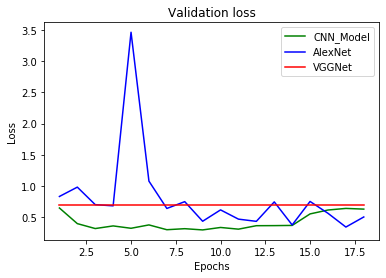

In [15]:
#loss_train = h.history['loss']
loss_val1 =h1.history['val_loss']
loss_val2 =h2.history['val_loss']
loss_val3 =h3.history['val_loss']
epochs = range(1,19)
plt.plot(epochs, loss_val1, 'g', label='CNN_Model')
plt.plot(epochs, loss_val2, 'b', label='AlexNet')
plt.plot(epochs, loss_val3, 'r', label='VGGNet')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

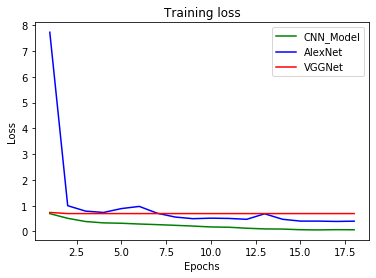

In [16]:
loss_val1 =h1.history['loss']
loss_val2 =h2.history['loss']
loss_val3 =h3.history['loss']
epochs = range(1,19)
plt.plot(epochs, loss_val1, 'g', label='CNN_Model')
plt.plot(epochs, loss_val2, 'b', label='AlexNet')
plt.plot(epochs, loss_val3, 'r', label='VGGNet')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

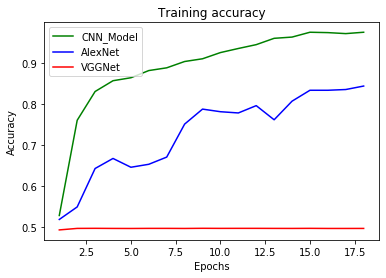

In [20]:
loss_val1 = h1.history['accuracy']
loss_val2 = h2.history['accuracy']
loss_val3 = h3.history['accuracy']
#loss_val = h.history['val_accuracy']
epochs = range(1,19)
plt.plot(epochs, loss_val1, 'g', label='CNN_Model')
plt.plot(epochs, loss_val2, 'b', label='AlexNet')
plt.plot(epochs, loss_val3, 'r', label='VGGNet')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

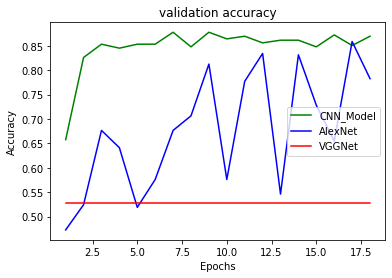

In [21]:
loss_val1 = h1.history['val_accuracy']
loss_val2 = h2.history['val_accuracy']
loss_val3 = h3.history['val_accuracy']
#loss_val = h.history['val_accuracy']
epochs = range(1,19)
plt.plot(epochs, loss_val1, 'g', label='CNN_Model')
plt.plot(epochs, loss_val2, 'b', label='AlexNet')
plt.plot(epochs, loss_val3, 'r', label='VGGNet')
plt.title('validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        3

In [18]:
import os
path = os.chdir('C:/Users/91895/OneDrive/Desktop/datasets/')
model.save('smileDetection.model')
#tf.keras.models.save_model(model, "saved_model.hp5", save_format="h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: smileDetection.model\assets


In [2]:
import cv2
import tensorflow as tf
#from google.colab.patches import cv2_imshow
Categories = ["smile", "No Smile"]

def prepare(filepath):
    Img_size = 200
    Img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(Img_array,(Img_size,Img_size))
    return new_array.reshape(-1,Img_size,Img_size,1)

model = tf.keras.models.load_model("C:/Users/91895/OneDrive/Desktop/datasets/smileDetection.model")

prediction = model.predict([prepare("C:/Users/91895/OneDrive/Desktop/datasets/s/file1846.jpg")])
face_cascade = cv2.CascadeClassifier("C:/Users/91895/OneDrive/Desktop/haarcascade_frontalface_default.xml")
img = cv2.imread("C:/Users/91895/OneDrive/Desktop/datasets/s/file1846.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1,4)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),2)

vid=cv2.VideoCapture(0)
cv2.imshow('image',img)
cv2.waitKey()
#print(Categories[int(prediction[0][0])])
print(int(prediction))
if (prediction==0):
    print("Smiling")
else :
    print("not Smiling")

0
Smiling


In [3]:
import cv2
import tensorflow as tf

video = cv2.VideoCapture(0)

Categories = ["smile", "No Smile"]

def prepare(filepath):
    Img_size = 200
    Img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(Img_array,(Img_size,Img_size))
    return new_array.reshape(-1,Img_size,Img_size,1)

model = tf.keras.models.load_model("C:/Users/91895/OneDrive/Desktop/datasets/smileDetection.model")
def getframes(sec):
    video.set(cv2.CAP_PROP_POS_MSEC, sec*1000)
    hasframes, image=video.read()
    if hasframes:
        cv2.imwrite("image"+str(count)+".jpg", image)     # save frame as JPG file
        prediction = model.predict([prepare("image"+str(count)+".jpg")])
        if(prediction==0):
            print("Image "+str(count)+"Saved")
            path=r'C:/Users/91895/OneDrive/Desktop/datasets/ns/img'+str(count)+'.jpg'
            cv2.imwrite(path,image)
        else:
            print("Not Smiling")

    return hasframes
sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getframes(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getframes(sec)


Image 1Saved
Image 2Saved
Image 3Saved
Image 4Saved
Image 5Saved
Image 6Saved
Image 7Saved
Image 8Saved
Image 9Saved
Image 10Saved
Image 11Saved
Image 12Saved
Image 13Saved
Image 14Saved
Image 15Saved
Image 16Saved
Image 17Saved
Image 18Saved
Image 19Saved
Image 20Saved
Image 21Saved
Image 22Saved
Image 23Saved
Image 24Saved
Image 25Saved
Image 26Saved
Image 27Saved
Image 28Saved
Image 29Saved
Image 30Saved
Image 31Saved
Image 32Saved
Image 33Saved
Image 34Saved
Image 35Saved
Image 36Saved
Image 37Saved
Image 38Saved
Image 39Saved
Image 40Saved
Image 41Saved
Image 42Saved
Image 43Saved
Image 44Saved
Image 45Saved
Image 46Saved
Image 47Saved
Image 48Saved
Image 49Saved
Image 50Saved
Image 51Saved
Image 52Saved
Image 53Saved
Image 54Saved
Image 55Saved
Image 56Saved
Image 57Saved
Image 58Saved
Image 59Saved
Image 60Saved
Image 61Saved
Image 62Saved
Image 63Saved
Image 64Saved
Image 65Saved
Image 66Saved
Image 67Saved
Image 68Saved
Image 69Saved
Image 70Saved
Image 71Saved
Image 72Saved
I

KeyboardInterrupt: 

In [1]:
import cv2
import tensorflow as tf

video = cv2.VideoCapture(0)

Categories = ["smile", "No Smile"]

def prepare(filepath):
    Img_size = 200
    Img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(Img_array,(Img_size,Img_size))
    return new_array.reshape(-1,Img_size,Img_size,1)

model = tf.keras.models.load_model("C:/Users/91895/OneDrive/Desktop/datasets/smileDetection.model")
def getframes(sec):
    video.set(cv2.CAP_PROP_POS_MSEC, sec*1000)
    hasframes, image=video.read()
    
    face_cascade = cv2.CascadeClassifier("C:/Users/91895/OneDrive/Desktop/haarcascade_frontalface_default.xml")

    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1,4)
    for (x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w, y+h),(255,0,0),2)

    if hasframes:
        
        cv2.imwrite("image"+str(count)+".jpg", image)     # save frame as JPG file
        prediction = model.predict([prepare("image"+str(count)+".jpg")])
        
        if(prediction==0):
            print("Image "+str(count)+"Saved")
            path=r'C:/Users/91895/OneDrive/Desktop/datasets/ns/img'+str(count)+'.jpg'
            cv2.imwrite(path,image)
            
        else:
            print("Not Smiling")
    #cv2.imshow('live video', image)   
    return hasframes
sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getframes(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getframes(sec)

Image 1Saved
Image 2Saved
Image 3Saved
Image 4Saved
Image 5Saved
Image 6Saved
Image 7Saved
Image 8Saved
Image 9Saved
Image 10Saved
Image 11Saved
Image 12Saved
Image 13Saved
Image 14Saved
Image 15Saved
Image 16Saved
Image 17Saved
Image 18Saved


KeyboardInterrupt: 